# hSBM First Try

Exploring the Martin Gerlach hSBM algorithm on single omics layers (https://github.com/martingerlach/hSBM_Topicmodel/blob/master/TopSBM-tutorial.ipynb) by using the example from Fillipo including the topicpy package (https://topicpy.readthedocs.io/en/latest/hsbmpy.html).

## Import data 

In [1]:
import pandas as pd

In [2]:
mb_cluster = pd.read_csv("../MB/nsbm_input/mb_cluster_263s_nsbmprep.csv")
mb_cluster = mb_cluster.set_index("sample")
mb_cluster.head

<bound method NDFrame.head of        Unnamed: 0 MB_subgroup        MDT_JT Proteome_2023
sample                                                   
MB170       MB170          G4  Group4_gamma     G4_prot_a
MB349       MB349          G3  Group3_alpha     G3_prot_c
MB233       MB233          G3   Group3_beta     G4_prot_b
MB051       MB051          G4   Group4_beta     G4_prot_c
MB064       MB064         WNT           WNT           WNT
...           ...         ...           ...           ...
MB328       MB328         WNT           WNT           WNT
MB124       MB124          G4  Group4_gamma     G4_prot_a
MB028       MB028         WNT           WNT           WNT
MB212       MB212          G4  Group4_alpha     G4_prot_c
MB040       MB040         SHH     SHH_gamma    SHH_prot_b

[236 rows x 4 columns]>

In [3]:
mb_protc = pd.read_csv("../MB/nsbm_input/mb_prot_c_263s_nsbmprep.csv", index_col=0).fillna(0).astype(int)
mb_prot = pd.read_csv("../MB/nsbm_input/mb_prot_263s_nsbmprep.csv", index_col=0).fillna(0).astype(int)
mb_rna = pd.read_csv("../MB/nsbm_input/mb_rna_263s_nsbmprep.csv", index_col=0).fillna(0).astype(int)
mb_phos = pd.read_csv("../MB/nsbm_input/mb_aggphospho_263s_nsbmprep.csv", index_col=0).fillna(0).astype(int)

In [5]:
mb_protc.head()

,MB170,MB349,MB233,MB051,MB064,MB317,MB085,MB032,MB316,MB381,...,MB099,MB332,MB123,MB114,MB262,MB328,MB124,MB028,MB212,MB040
A1BG,18,19,17,19,19,18,17,19,17,19,...,19,19,0,19,19,19,17,16,15,19
A1CF,0,1,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,2,0,1,0
A2M,97,96,98,110,108,101,83,106,101,110,...,94,96,0,98,110,82,99,102,102,103
A2ML1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAS,22,25,21,13,20,21,20,23,17,25,...,20,23,0,23,15,23,23,23,20,17


In [34]:
brca_prot = pd.read_csv("../BRCA/nsbm_input/brca_proteo_119s_nsbmprep.csv", index_col=0).fillna(0).astype(int)

In [35]:
brca_prot.head()

,X01BR001,X01BR008,X01BR009,X01BR010,X01BR015,X01BR017,X01BR018,X01BR020,X01BR023,X01BR025,...,X20BR002,X20BR005,X20BR006,X20BR007,X20BR008,X21BR001,X21BR002,X21BR010,X22BR005,X22BR006
TSPAN6,2512,4712,6247,30399,2097,3297,3133,2741,3563,7675,...,1886,6802,5435,10441,8301,2535,3294,0,6153,9478
TNMD,0,0,0,0,0,0,61,0,0,0,...,442,0,0,186,242,0,0,0,0,0
DPM1,54823,60804,51900,91657,62071,61295,53401,50246,72180,92047,...,57881,75644,44851,58660,85977,62612,68273,71310,52060,70893
SCYL3,15853,14062,14391,21090,13200,11366,19477,11292,13654,23311,...,12021,11046,13894,9928,16746,17273,18817,18679,17714,21478
FIRRM,0,639,252,0,0,643,820,0,0,0,...,0,0,0,0,0,519,597,0,0,933


## Run hSBM algorithm

In [2]:
import sys, os
sys.path.append("../hSBM_Topicmodel/")

In [7]:
from sbmtm import sbmtm

In [36]:
#define model
model = sbmtm()

In [37]:
#Build graph from one omics layer
model.make_graph_from_BoW_df(df=brca_protc)

In [ ]:
#fit the model (has to be done on a computing cluster, only protc)
model.fit()

The only dataset where the model fitting worked on my laptop without the need of a cluster is MB proteomics count table (mb_protc).

In [3]:
#Save the model with pickle
import pickle

In [13]:
os.chdir("mb_protc")
file = open('mb_protc_sbmtm', 'wb')

In [14]:
pickle.dump(model, file)

In [15]:
file.close()

In [4]:
file = open('mb_protc_sbmtm', 'rb')
model = pickle.load(file)
file.close()

## Investigate Results with standart hSBM functionalities

In [5]:
import pylab as plt

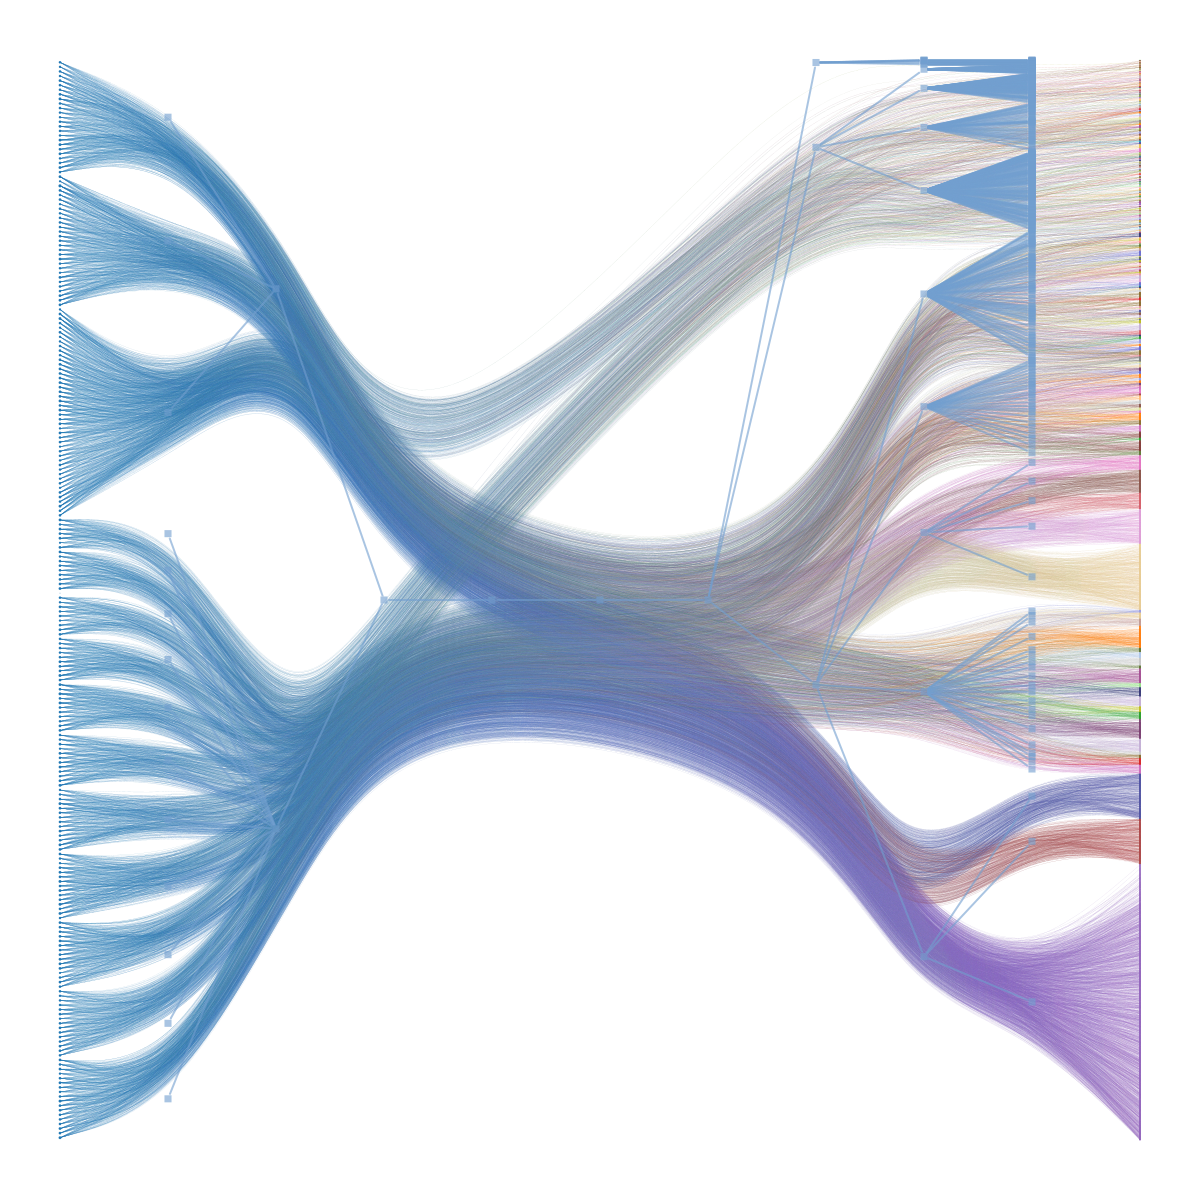

In [6]:
model.plot(nedges=10000)

In [7]:
model.topics(l=1,n=5)

/home/labo/ACK_masterthesis/topic_modeling/../hSBM_Topicmodel/sbmtm.py:570: RuntimeWarning: invalid value encountered in divide
  p_tw_w = (n_wb/np.sum(n_wb,axis=1)[:,np.newaxis]).T


{0: [('2471', 0.006317935152095086),
  ('6777', 0.00484662575420011),
  ('3943', 0.0029848214377304148),
  ('8232', 0.002822964323208348),
  ('5872', 0.00274034903719113)],
 1: [('9089', 0.02980786794865408),
  ('9062', 0.028752460925031045),
  ('704', 0.028579019910659427),
  ('266', 0.027560515230519715),
  ('8630', 0.02209527816063959)],
 2: [('1802', 0.016766410318374156),
  ('8376', 0.012840632862808649),
  ('4481', 0.011920906364166204),
  ('275', 0.011303964632464782),
  ('3118', 0.010930577470728437)],
 3: [('2584', 0.006560735897281417),
  ('1170', 0.005760416364501415),
  ('8179', 0.0051443091653197845),
  ('5319', 0.004955882013859809),
  ('2523', 0.004504648572205656)],
 4: [('8631', 0.030832593895515473),
  ('2439', 0.018030067853780644),
  ('482', 0.014954093780782643),
  ('3117', 0.013146724530402455),
  ('4647', 0.012799908562733555)],
 5: [('241', 0.016304618773312546),
  ('2438', 0.01371672792701332),
  ('1938', 0.012979111052695985),
  ('7270', 0.011562796009843956),

In [ ]:
model.print_topics()

In [9]:
model.clusters(l=0,n=5)

{0: [('MB253', 1.0),
  ('MB006', 1.0),
  ('MB233', 1.0),
  ('MB032', 1.0),
  ('MB097', 1.0)],
 1: [('MB005', 1.0),
  ('MB078', 1.0),
  ('MB074', 1.0),
  ('MB271', 1.0),
  ('MB321', 1.0)],
 2: [('MB134', 1.0),
  ('MB315', 1.0),
  ('MB068', 1.0),
  ('MB036', 1.0),
  ('MB307', 1.0)],
 3: [('MB344', 1.0),
  ('MB055', 1.0),
  ('MB279', 1.0),
  ('MB215', 1.0),
  ('MB356', 1.0)],
 4: [('MB108', 1.0),
  ('MB147', 1.0),
  ('MB228', 1.0),
  ('MB285', 1.0),
  ('MB384', 1.0)],
 5: [('MB282', 1.0),
  ('MB085', 1.0),
  ('MB031', 1.0),
  ('MB277', 1.0),
  ('MB288', 1.0)],
 6: [('MB010', 1.0),
  ('MB207', 1.0),
  ('MB027', 1.0),
  ('MB192', 1.0),
  ('MB227', 1.0)],
 7: [('MB040', 1.0),
  ('MB201', 1.0),
  ('MB305', 1.0),
  ('MB229', 1.0),
  ('MB004', 1.0)],
 8: [('MB216', 1.0),
  ('MB217', 1.0),
  ('MB324', 1.0),
  ('MB211', 1.0),
  ('MB039', 1.0)],
 9: [('MB380', 1.0),
  ('MB024', 1.0),
  ('MB103', 1.0),
  ('MB318', 1.0),
  ('MB101', 1.0)],
 10: [('MB129', 1.0),
  ('MB210', 1.0),
  ('MB204', 1.0),
  

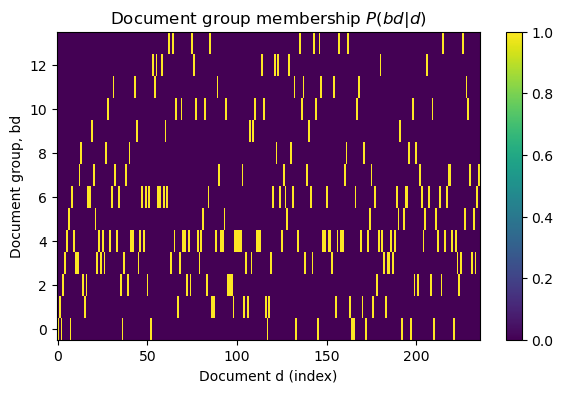

In [10]:
p_td_d, p_tw_w = model.group_membership(l=0)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.imshow(p_td_d,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Document group membership $P(bd | d)$')
plt.xlabel('Document d (index)')
plt.ylabel('Document group, bd')
plt.colorbar()

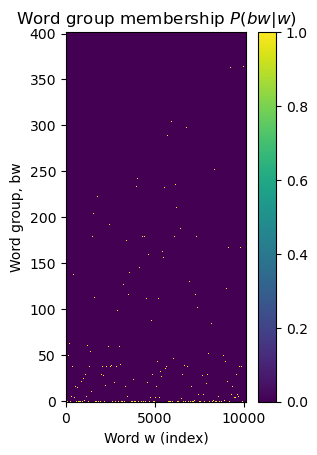

In [11]:
plt.subplot(122)
plt.imshow(p_tw_w,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Word group membership $P(bw | w)$')
plt.xlabel('Word w (index)')
plt.ylabel('Word group, bw')
plt.colorbar()

## Analyse output with topicpy

In [ ]:
#first save results in the matching directory, together with the annotation file
#os.mkdir("topsbm")
os.chdir("topsbm")
model.save_data()
os.chdir("../")
mb_cluster.to_csv("files.dat")

In [ ]:
from topicpy.hsbmpy import *

In [ ]:
directory="/home/ACK_Masterthesis/topic_modeling/mb_protc"
algorithm = "topsbm"
labels = mb_cluster.columns
L=2

In [ ]:
#run the analysis function from hsbmpy class
clusteranalysis(directory=directory, labels=labels, algorithm=algorithm)